# Factoring and period finding

In [108]:
"""
Factoring and period finding
"""

from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
import sys

np.set_printoptions(threshold=sys.maxsize)

from fractions import Fraction

from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

In [81]:
# Directly prepare the quantum state:
def get_coeffs(x, N, n_q, n_count):
    """
    x-> guess
    N-> target number
    n_q -> number of qubits
    n_count -> number qubits for qft #t
    """
    vec = np.zeros(2 ** n_q)
    base = 1
    for i in range(2 ** n_count):
        s1 = np.binary_repr(i, n_count)
        mod2 = np.mod(base, N)
        base = mod2 * x
        s2 = np.binary_repr(mod2, n_q - n_count)
        print(i, mod2, s1, s2)
        vec[int(s2 + s1, 2)] = 1
    return vec


def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / float(2 ** (j - m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc


##  Example: x=3, N=15:

In [82]:
# Example: x=3, N=15:

x = 3
N = 15
n_q = 10  # total number of Qubits (QFT_register + a**i_register)
n_count = 4  # number of qubits of QFT_register

print("x:", x)
print("N:", N)
print("n_q:", n_q)
print("n_count:", n_count)

vec = get_coeffs(x, N, n_q, n_count)
vec =  np.multiply(vec, 1/np.sqrt(2**n_count))
print("vec:", vec)


x: 3
N: 15
n_q: 10
n_count: 4
0 1 0000 000001
1 3 0001 000011
2 9 0010 001001
3 12 0011 001100
4 6 0100 000110
5 3 0101 000011
6 9 0110 001001
7 12 0111 001100
8 6 1000 000110
9 3 1001 000011
10 9 1010 001001
11 12 1011 001100
12 6 1100 000110
13 3 1101 000011
14 9 1110 001001
15 12 1111 001100
vec: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.25 0.   0.
 0.   0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.25 0.   0.   0.   0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0. 

In [83]:
## Simulation:

Q = QuantumCircuit(n_q,n_count)
Q.initialize(vec)

Q.append(qft_dagger(n_count),range(n_count))
Q.measure(range(n_count),range(n_count))
Q.draw(fold=-1)  # -1 means 'do not fold'

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐┌───────┐┌─┐         
q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

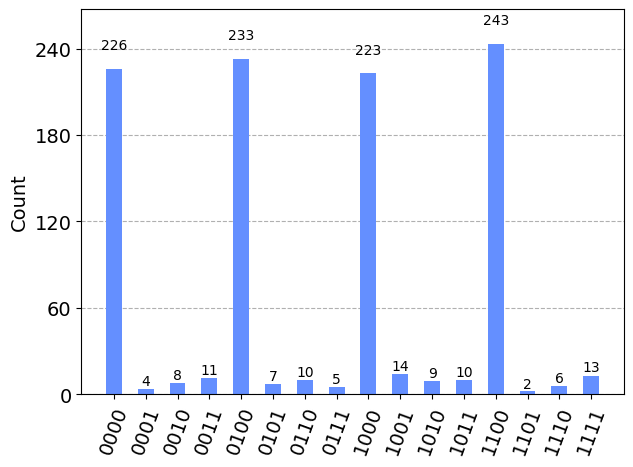

In [84]:
# Run simualtion
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(Q, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [85]:
## Compute the continuous fraction, and obtain from there the candidate factors:

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)

    # Add these values to the rows in our table:
    frac = Fraction(phase).limit_denominator(N)
    #rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**n_count} = {phase:.2f}",f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
# Print the rows in a table
#headers=["Register Output", "Phase", "Fraction", "Guess for r", "guess1","guess2"]
headers=["Register Output", "Fraction", "Guess for r", "guess1","guess2"]
df = pd.DataFrame(rows, columns=headers)
print(df)

         Register Output Fraction  Guess for r  guess1  guess2
0   0001(bin) =   1(dec)     1/15           15       1       1
1   0011(bin) =   3(dec)     2/11           11       1       1
2   0101(bin) =   5(dec)     4/13           13       1       5
3   0110(bin) =   6(dec)      3/8            8       5       1
4   1011(bin) =  11(dec)     9/13           13       1       5
5   1010(bin) =  10(dec)      5/8            8       5       1
6   0111(bin) =   7(dec)      4/9            9       5       1
7   1101(bin) =  13(dec)     9/11           11       1       1
8   1111(bin) =  15(dec)    14/15           15       1       1
9   1001(bin) =   9(dec)      5/9            9       5       1
10  1000(bin) =   8(dec)      1/2            2       1       1
11  0100(bin) =   4(dec)      1/4            4       1       5
12  1100(bin) =  12(dec)      3/4            4       1       5
13  1110(bin) =  14(dec)      7/8            8       5       1
14  0010(bin) =   2(dec)      1/8            8       5 

## Assignement 

For the assignement I choose the number: N=21 and x= 3,4,5,9.

In [86]:
N=21
x_=[2,3,8,18]

In [87]:
def expansion(x,N,p=3):
    s=x**1%N
    k=1
    xpmo= []
    while p!=0:
        pmo=x**k%N
#         print(pmo)
        xpmo.append(pmo)
        if pmo==s:
            p=p-1
        k+=1
    return xpmo, k


In [88]:
px_=[]
for x in x_:
    pmo, k = expansion(x,N)
    print("x={}, k={}".format(x,k))
    px_.append( [pmo , k])

x=2, k=14
x=3, k=14
x=8, k=6
x=18, k=8


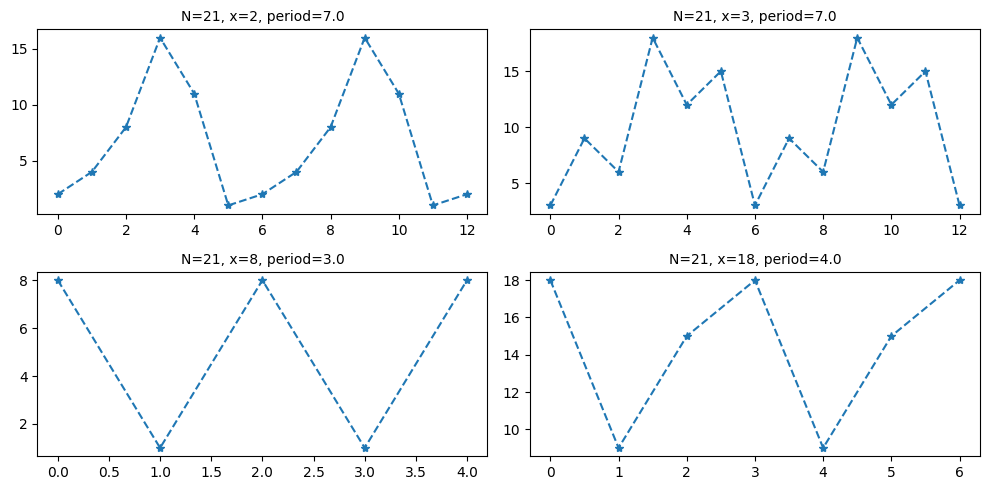

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    ax[int(i/2),i%2].plot( px_[i][0] , "*--")
    ax[int(i/2),i%2].set_title("N={}, x={}, period={}".format(N, x, px_[i][1]/2), fontsize = 10)


plt.tight_layout()
plt.show()

In [90]:
def get_counts(x,N,n_q, n_count):
    vec = get_coeffs(x, N, n_q, n_count)
    vec =  np.multiply(vec, 1/np.sqrt(2**n_count))

    Q = QuantumCircuit(n_q,n_count)
    Q.initialize(vec)

    Q.append(qft_dagger(n_count),range(n_count))
    Q.measure(range(n_count),range(n_count))
    # Q.draw(fold=-1)  # -1 means 'do not fold'

    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(Q, aer_sim)
    qobj = assemble(t_qc)
    results = aer_sim.run(qobj).result()
    counts = results.get_counts()
    
    return counts

In [91]:
nr_qubit_d = 5# nr o qubits without the qubits for qft (without the first t qubits)
experiments= {2:{}, 3:{},4:{},5:{}, 6:{}}

for t in experiments.keys():
    experiments[t]["counts"]= []
    for x in x_:
        print("t={}|x={}".format(t,x))
        experiments[t]["counts"].append(get_counts(x,N,nr_qubit_d+t, n_count=t))
    print("\n\n")

t=2|x=2
0 1 00 00001
1 2 01 00010
2 4 10 00100
3 8 11 01000
t=2|x=3
0 1 00 00001
1 3 01 00011
2 9 10 01001
3 6 11 00110
t=2|x=8
0 1 00 00001
1 8 01 01000
2 1 10 00001
3 8 11 01000
t=2|x=18
0 1 00 00001
1 18 01 10010
2 9 10 01001
3 15 11 01111



t=3|x=2
0 1 000 00001
1 2 001 00010
2 4 010 00100
3 8 011 01000
4 16 100 10000
5 11 101 01011
6 1 110 00001
7 2 111 00010
t=3|x=3
0 1 000 00001
1 3 001 00011
2 9 010 01001
3 6 011 00110
4 18 100 10010
5 12 101 01100
6 15 110 01111
7 3 111 00011
t=3|x=8
0 1 000 00001
1 8 001 01000
2 1 010 00001
3 8 011 01000
4 1 100 00001
5 8 101 01000
6 1 110 00001
7 8 111 01000
t=3|x=18
0 1 000 00001
1 18 001 10010
2 9 010 01001
3 15 011 01111
4 18 100 10010
5 9 101 01001
6 15 110 01111
7 18 111 10010



t=4|x=2
0 1 0000 00001
1 2 0001 00010
2 4 0010 00100
3 8 0011 01000
4 16 0100 10000
5 11 0101 01011
6 1 0110 00001
7 2 0111 00010
8 4 1000 00100
9 8 1001 01000
10 16 1010 10000
11 11 1011 01011
12 1 1100 00001
13 2 1101 00010
14 4 1110 00100
15 8 1111 01000
t=

In [131]:
def order_counts(counts):  
    hd =experiments[2]["counts"][0]
    h = [(str(key), hd[key]) for key in hd]
    h.sort(key = itemgetter(0))
    print(h)
    hd = {}
    for e in h:
        hd[e[0]]=e[1]
    return hd 

[('00', 250), ('01', 251), ('10', 262), ('11', 261)]
[('00', 254), ('01', 245), ('10', 265), ('11', 260)]
[('00', 519), ('10', 505)]
[('00', 236), ('01', 258), ('10', 280), ('11', 250)]


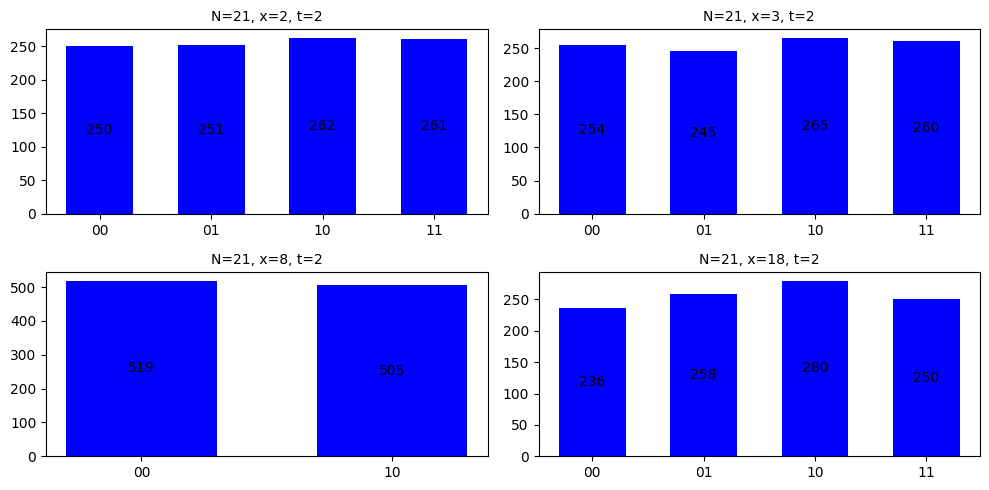

In [132]:
t = 2

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

[('000', 185), ('001', 143), ('010', 58), ('011', 135), ('100', 208), ('101', 137), ('110', 54), ('111', 104)]
[('000', 155), ('001', 136), ('010', 91), ('011', 134), ('100', 148), ('101', 137), ('110', 90), ('111', 133)]
[('000', 529), ('100', 495)]
[('000', 279), ('001', 41), ('010', 105), ('011', 213), ('100', 38), ('101', 218), ('110', 88), ('111', 42)]


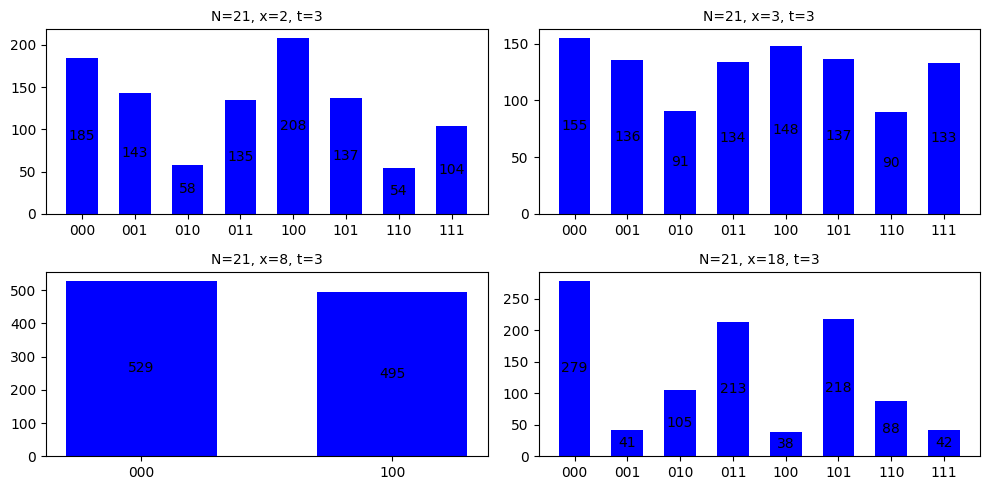

In [133]:
t = 3

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

[('0000', 164), ('0001', 4), ('0010', 36), ('0011', 112), ('0100', 8), ('0101', 108), ('0110', 37), ('0111', 7), ('1000', 192), ('1001', 8), ('1010', 34), ('1011', 125), ('1100', 22), ('1101', 122), ('1110', 34), ('1111', 11)]
[('0000', 143), ('0001', 14), ('0010', 40), ('0011', 123), ('0100', 11), ('0101', 128), ('0110', 37), ('0111', 10), ('1000', 164), ('1001', 11), ('1010', 45), ('1011', 120), ('1100', 17), ('1101', 116), ('1110', 34), ('1111', 11)]
[('0000', 502), ('1000', 522)]
[('0000', 276), ('0001', 5), ('0010', 4), ('0011', 6), ('0100', 19), ('0101', 245), ('0110', 80), ('0111', 22), ('1000', 12), ('1001', 19), ('1010', 74), ('1011', 234), ('1100', 12), ('1101', 7), ('1110', 5), ('1111', 4)]


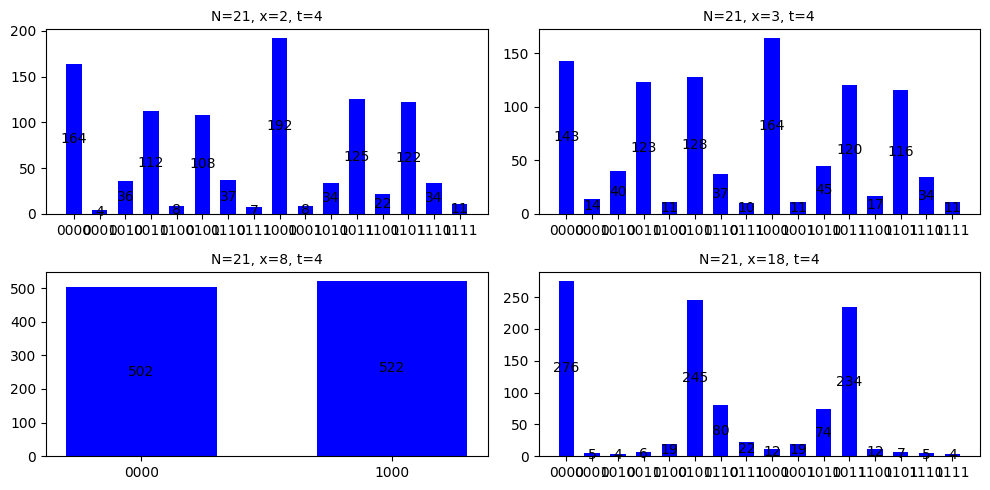

In [134]:
t = 4

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

[('00000', 176), ('00001', 1), ('00010', 3), ('00011', 3), ('00100', 7), ('00101', 113), ('00110', 36), ('00111', 5), ('01000', 3), ('01001', 5), ('01010', 28), ('01011', 115), ('01100', 11), ('01101', 3), ('01110', 1), ('01111', 3), ('10000', 171), ('10001', 1), ('10010', 3), ('10011', 1), ('10100', 8), ('10101', 119), ('10110', 36), ('10111', 5), ('11000', 4), ('11001', 9), ('11010', 32), ('11011', 111), ('11100', 5), ('11101', 2), ('11110', 3), ('11111', 1)]
[('00000', 183), ('00001', 3), ('00010', 3), ('00011', 1), ('00100', 7), ('00101', 117), ('00110', 33), ('00111', 5), ('01000', 4), ('01001', 5), ('01010', 34), ('01011', 114), ('01100', 8), ('01101', 1), ('01110', 2), ('01111', 3), ('10000', 159), ('10010', 1), ('10011', 4), ('10100', 7), ('10101', 114), ('10110', 30), ('10111', 8), ('11000', 5), ('11001', 13), ('11010', 35), ('11011', 114), ('11100', 4), ('11101', 2), ('11110', 3), ('11111', 2)]
[('00000', 507), ('10000', 517)]
[('00000', 317), ('00001', 4), ('00011', 5), ('00

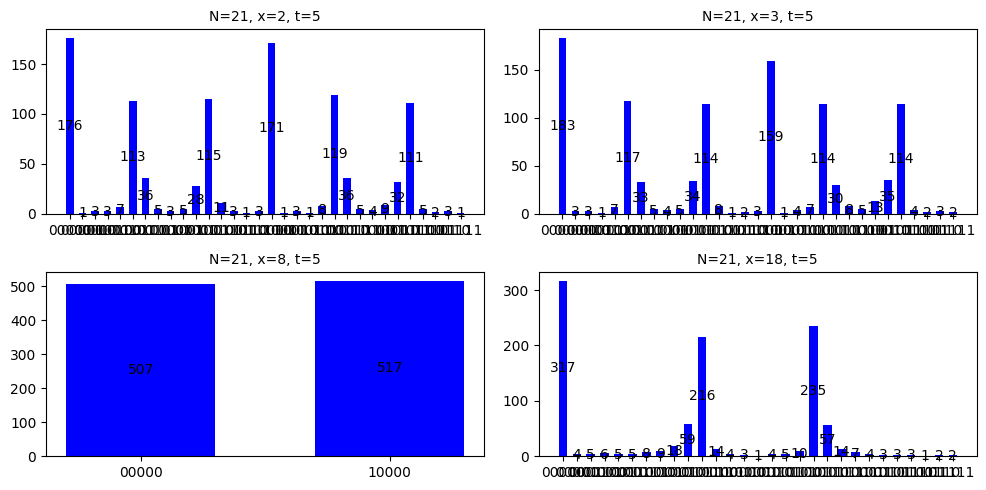

In [135]:
t = 5

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

[('000000', 163), ('000010', 1), ('000100', 1), ('000110', 4), ('001000', 1), ('001001', 9), ('001010', 27), ('001011', 100), ('001100', 12), ('001101', 2), ('001110', 1), ('010000', 1), ('010001', 2), ('010010', 1), ('010011', 4), ('010100', 3), ('010101', 129), ('010110', 31), ('010111', 6), ('011000', 2), ('011001', 1), ('011110', 1), ('100000', 174), ('100011', 1), ('100101', 1), ('100110', 2), ('100111', 1), ('101000', 2), ('101001', 5), ('101010', 34), ('101011', 110), ('101100', 7), ('101101', 5), ('101110', 1), ('101111', 2), ('110001', 2), ('110011', 2), ('110100', 8), ('110101', 118), ('110110', 30), ('110111', 9), ('111000', 3), ('111001', 2), ('111010', 1), ('111100', 1), ('111101', 1)]
[('000000', 162), ('000010', 1), ('000011', 2), ('000100', 1), ('000101', 1), ('000110', 2), ('000111', 3), ('001000', 3), ('001001', 8), ('001010', 38), ('001011', 103), ('001100', 5), ('010001', 1), ('010011', 2), ('010100', 6), ('010101', 130), ('010110', 33), ('010111', 6), ('011001', 1)

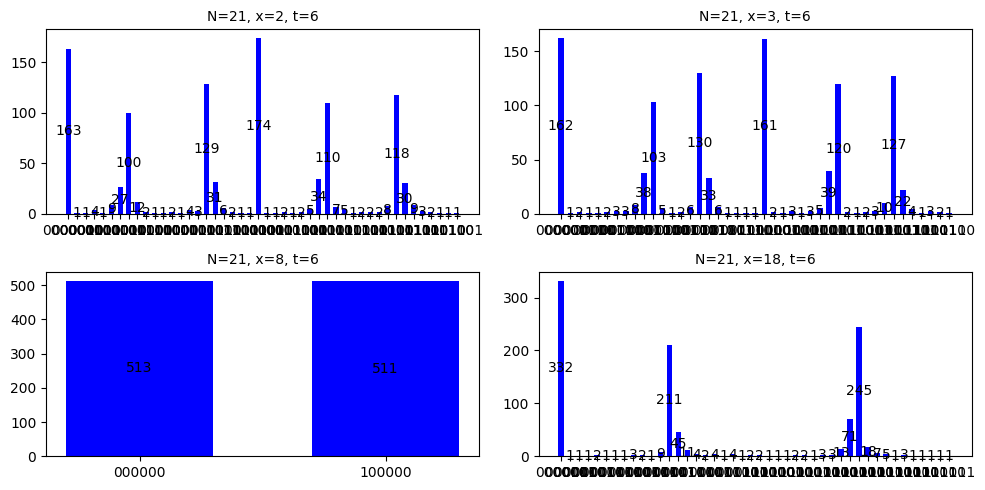

In [136]:
t = 6

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))

for i, x in enumerate(x_):
    
    counts = order_counts(experiments[t]["counts"][i])
    for binary, count in counts.items():
        p = ax[int(i/2),i%2].bar(binary, count, width=0.6, color="b" )
        ax[int(i/2),i%2].bar_label(p, label_type='center')
    ax[int(i/2),i%2].set_title("N={}, x={}, t={}".format(N, x, t), fontsize = 10)


plt.tight_layout()
plt.show()

In [137]:
t
n_count=t
counts = experiments[n_count]["counts"][3]

rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)

    # Add these values to the rows in our table:
    frac = Fraction(phase).limit_denominator(N)
    #rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{decimal}/{2**n_count} = {phase:.2f}",f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", f"{frac.numerator}/{frac.denominator}", frac.denominator, np.gcd(x**(frac.denominator//2)-1, N), np.gcd(x**(frac.denominator//2)+1, N)])
# Print the rows in a table
#headers=["Register Output", "Phase", "Fraction", "Guess for r", "guess1","guess2"]
headers=["Register Output", "Fraction", "Guess for r", "guess1","guess2"]
df = pd.DataFrame(rows, columns=headers)
print(df)

           Register Output Fraction  Guess for r  guess1  guess2
0   100010(bin) =  34(dec)     9/17           17       1       1
1   111001(bin) =  57(dec)      8/9            9       1       1
2   011111(bin) =  31(dec)    10/21           21       1       1
3   100100(bin) =  36(dec)     9/16           16       1       1
4   001111(bin) =  15(dec)     4/17           17       1       1
5   000110(bin) =   6(dec)     2/21           21       1       1
6   011101(bin) =  29(dec)     5/11           11       1       1
7   011110(bin) =  30(dec)     8/17           17       1       1
8   001001(bin) =   9(dec)      1/7            7       7       1
9   010010(bin) =  18(dec)     5/18           18       7       1
10  011010(bin) =  26(dec)     7/17           17       1       1
11  100110(bin) =  38(dec)    10/17           17       1       1
12  100000(bin) =  32(dec)      1/2            2       1       1
13  011011(bin) =  27(dec)     8/19           19       7       1
14  101101(bin) =  45(dec